In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import sklearn.metrics
from sklearn.multiclass import OneVsRestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [2]:
#eddigi
data_2021 = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/ONKUTFEL2/NYERS_2021/data_2021_SZŰKJÓ.xlsx")
data_2019 = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/2019/2019_MAIN_CLEANED.xlsx")

#kumulált átlagok
kum_2021 = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/ONKUTFEL2/NYERS_2021/ATLAG_ES_PONT.xlsx")
kum_2019 = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/ONKUTFEL2/NYERS_2019/ATLAG_ES_PONT.xlsx")

In [3]:
full_2021 = data_2021.merge(kum_2021, left_on = 'Neptun', right_on = 'NEPTUNKOD', how= "inner")
full_2019 = data_2019.merge(kum_2019, left_on = 'Neptun', right_on = 'NEPTUNKOD', how= "inner")

In [4]:
list(full_2021.columns)

['Name',
 'Neptun',
 'Mat_term_tag',
 'Emelt',
 'Tankör',
 'Szak',
 'Matek 1-4 helyes',
 'Matek 5-10 helyes',
 'Matek 11-14 helyes',
 'Matek helyes',
 'Matek eredmény',
 'Kognitív pont',
 'Kognitív eredmény',
 'Össz eredmény (átlag)',
 'ZH0',
 'Tanulmányi pont',
 'Érettségi pont',
 'Többletpont',
 'Összes pont',
 'Matematika A1a - Analízis',
 'NEPTUNKOD',
 'NEV',
 'FELV_FELEV',
 'KEP_JOGV_KEZD',
 'KEPZ_JOGV_OK',
 'KEPZ_JOGV_VEG',
 'KEPZ_JOGV_VEG_OK',
 'KEPZ_STATUSZ',
 'KEPZ_PU_STATUSZ',
 'KEPZES',
 'ELSO_FELEV',
 'ELSO_FELEV_STATUSZ',
 'ELSO_FELEV_PU_STATUSZ',
 'ELSO_FELEV_TELJESITETT_KR',
 'ELSO_FELEV_MEGSZERZETT_KR',
 'ELSO_FELEV_ELISMERT_KR',
 'ELSO_FELEV_ATLAG',
 'FELEV',
 'FELEV_STATUSZ',
 'FELEV_PU_STATUSZ',
 'TELJESITETT_KR',
 'MEGSZERZETT_KR',
 'ELISMERT_KR',
 'ATLAG',
 'KUM_TELJESITETT_KR',
 'KUM_MEGSZERZETT_KR',
 'KUM_ELISMERT_KR',
 'KUM_ATLAG',
 'FELVETEL',
 'FELVETEL_MOD',
 'FELVETELI_ELJARASSAL',
 'FELV_OSSZ_PONTSZ',
 'FELV_HOZOTT_PONTSZ',
 'FEL_SZERZETT_PONTSZ',
 'FELV_TO

In [5]:
full_2021.columns

Index(['Name', 'Neptun', 'Mat_term_tag', 'Emelt', 'Tankör', 'Szak',
       'Matek 1-4 helyes', 'Matek 5-10 helyes', 'Matek 11-14 helyes',
       'Matek helyes', 'Matek eredmény', 'Kognitív pont', 'Kognitív eredmény',
       'Össz eredmény (átlag)', 'ZH0', 'Tanulmányi pont', 'Érettségi pont',
       'Többletpont', 'Összes pont', 'Matematika A1a - Analízis', 'NEPTUNKOD',
       'NEV', 'FELV_FELEV', 'KEP_JOGV_KEZD', 'KEPZ_JOGV_OK', 'KEPZ_JOGV_VEG',
       'KEPZ_JOGV_VEG_OK', 'KEPZ_STATUSZ', 'KEPZ_PU_STATUSZ', 'KEPZES',
       'ELSO_FELEV', 'ELSO_FELEV_STATUSZ', 'ELSO_FELEV_PU_STATUSZ',
       'ELSO_FELEV_TELJESITETT_KR', 'ELSO_FELEV_MEGSZERZETT_KR',
       'ELSO_FELEV_ELISMERT_KR', 'ELSO_FELEV_ATLAG', 'FELEV', 'FELEV_STATUSZ',
       'FELEV_PU_STATUSZ', 'TELJESITETT_KR', 'MEGSZERZETT_KR', 'ELISMERT_KR',
       'ATLAG', 'KUM_TELJESITETT_KR', 'KUM_MEGSZERZETT_KR', 'KUM_ELISMERT_KR',
       'KUM_ATLAG', 'FELVETEL', 'FELVETEL_MOD', 'FELVETELI_ELJARASSAL',
       'FELV_OSSZ_PONTSZ', 'FELV_HOZO

In [6]:
full_2021.drop(['NEPTUNKOD',
 'NEV',
 'FELV_FELEV',
 'KEP_JOGV_KEZD',
 'KEPZ_JOGV_OK',
 'KEPZ_JOGV_VEG',
 'KEPZ_JOGV_VEG_OK',
 'KEPZ_STATUSZ',
 'KEPZ_PU_STATUSZ',
 'KEPZES',
 'ELSO_FELEV',
 'ELSO_FELEV_STATUSZ',
 'ELSO_FELEV_PU_STATUSZ',
 'ELSO_FELEV_TELJESITETT_KR',
 'ELSO_FELEV_MEGSZERZETT_KR',
 'ELSO_FELEV_ELISMERT_KR',
 'FELEV',
 'FELEV_STATUSZ',
 'FELEV_PU_STATUSZ',
 'TELJESITETT_KR',
 'MEGSZERZETT_KR',
 'ELISMERT_KR',
 'ATLAG',
 'KUM_TELJESITETT_KR',
 'KUM_MEGSZERZETT_KR',
 'KUM_ELISMERT_KR',
 'KUM_ATLAG',
 'FELVETEL',
 'FELVETEL_MOD',
 'FELVETELI_ELJARASSAL',
 'FELV_OSSZ_PONTSZ',
 'FELV_HOZOTT_PONTSZ',
 'FEL_SZERZETT_PONTSZ',
 'FELV_TOBBLET_PONTSZ',
 'FELV_JOGSZABALYI_PONTSZ'], axis=1, inplace=True)

In [7]:
full_2019.drop(['NEPTUNKOD',
 'NEV',
 'FELV_FELEV',
 'KEP_JOGV_KEZD',
 'KEPZ_JOGV_OK',
 'KEPZ_JOGV_VEG',
 'KEPZ_JOGV_VEG_OK',
 'KEPZ_STATUSZ',
 'KEPZ_PU_STATUSZ',
 'KEPZES',
 'ELSO_FELEV',
 'ELSO_FELEV_STATUSZ',
 'ELSO_FELEV_PU_STATUSZ',
 'ELSO_FELEV_TELJESITETT_KR',
 'ELSO_FELEV_MEGSZERZETT_KR',
 'ELSO_FELEV_ELISMERT_KR',
 'FELEV',
 'FELEV_STATUSZ',
 'FELEV_PU_STATUSZ',
 'TELJESITETT_KR',
 'MEGSZERZETT_KR',
 'ELISMERT_KR',
 'ATLAG',
 'KUM_TELJESITETT_KR',
 'KUM_MEGSZERZETT_KR',
 'KUM_ELISMERT_KR',
 'KUM_ATLAG',
 'FELVETEL',
 'FELVETEL_MOD',
 'FELVETELI_ELJARASSAL',
 'FELV_OSSZ_PONTSZ',
 'FELV_HOZOTT_PONTSZ',
 'FEL_SZERZETT_PONTSZ',
 'FELV_TOBBLET_PONTSZ',
 'FELV_JOGSZABALYI_PONTSZ'], axis=1, inplace=True)

# Modellezés

## 2019

In [40]:
#szűrjük ki a nem kategorikus vagy numerikus változókat
working_data = full_2019.drop(labels = ["Name", "Neptun", "Tankör", "Matematika A1a - Analízis",'Kognitív pont', "Matematika A2c", "Szak", "Matek helyes", "Összes pont", "Össz eredmény (átlag)"], axis = 1)

#alakítsuk numerikussá a %-os teljesítménymutatókat
for i, row in working_data.iterrows():
    working_data.at[i, "Matek eredmény"] = float(row["Matek eredmény"][:-3] + "." + row["Matek eredmény"][-2])
    working_data.at[i, "Kognitív eredmény"] = float(row["Kognitív eredmény"][:-3] + "." + row["Kognitív eredmény"][-2])
    
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

features = working_data.drop(labels = ["ELSO_FELEV_ATLAG"], axis = 1)
label = working_data["ELSO_FELEV_ATLAG"]

X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(features, label, test_size=0.3, random_state=0)


#skálázás

from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_2019 = quantile_transformer.fit_transform(X_train_2019)
X_test_2019 = quantile_transformer.transform(X_test_2019)



D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (141). n_quantiles is set to n_samples.
  warnings.warn(


In [41]:
label.describe()

count    202.000000
mean       3.741584
std        0.614259
min        2.500000
25%        3.240000
50%        3.645000
75%        4.230000
max        5.000000
Name: ELSO_FELEV_ATLAG, dtype: float64

Coefficients: [ 0.12616244 -0.03180451 -0.11560124 -0.68747968 -0.18464784  1.41967262
 -0.05867973  0.18581344  0.42610247  0.58519941  0.28216997]
RMSE: 0.42
...................................................

R négyzet statisztika: 0.5967
...................................................


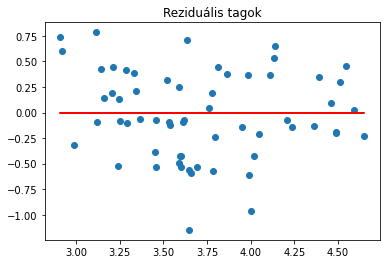

In [42]:
#ezek után nem oneVSall: lineáris regresszió
from sklearn.linear_model import LinearRegression


#tanító adaton
reg_alap_2019 = LinearRegression().fit(features,label)
reg_alap_2019.score(features, label) 

# tesztadattal

reg_2019 = LinearRegression().fit(X_train_2019,y_train_2019)
reg_pred_2019 = reg_2019.predict(X_test_2019)

#együtthatók
print("Coefficients:", reg_2019.coef_)
#RMSE

rmse = round(np.power(np.sum(np.power(y_test_2019 - reg_pred_2019, 2))/reg_pred_2019.shape[0],0.5),2)
print("RMSE:", rmse)

print("...................................................")
print("")


#R^2 és SSR
SST = np.sum(np.power(y_test_2019-np.mean(y_test_2019),2))
SSR = np.sum(np.power(reg_pred_2019-np.mean(y_test_2019),2))
R2 = round(SSR/SST,4)
print(f"R négyzet statisztika: {R2}")
import matplotlib.pyplot as plt


print("...................................................")

#Nézzük meg a reziduális tagokat

plt.scatter(reg_pred_2019, y_test_2019-reg_pred_2019)
plt.plot(reg_pred_2019, [0 for i in range(reg_pred_2019.shape[0])], c="red") #0-vonal
plt.title("Reziduális tagok")
plt.axis
plt.show()

(array([ 2.,  0.,  3., 10.,  6., 13.,  7.,  9.,  6.,  5.]),
 array([-1.14802717, -0.95475325, -0.76147932, -0.5682054 , -0.37493147,
        -0.18165755,  0.01161638,  0.2048903 ,  0.39816423,  0.59143815,
         0.78471208]),
 <BarContainer object of 10 artists>)

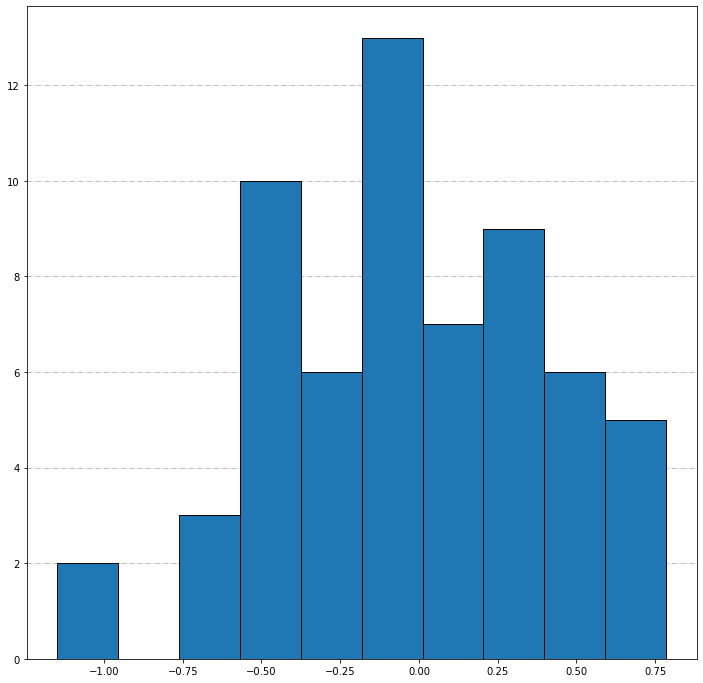

In [49]:
# a reziduálisok eloszlása

fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)
ax.grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax.hist(x=y_test_2019-reg_pred_2019, zorder=3, edgecolor='black')

## 2021

In [43]:
#szűrjük ki a nem kategorikus vagy numerikus változókat
working_data = full_2021.drop(labels = ["Name", "Neptun", "Tankör", "Matematika A1a - Analízis", "Szak", "Matek helyes","Kognitív pont", "Összes pont", "Össz eredmény (átlag)"], axis = 1)
    
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

features = working_data.drop(labels = ["ELSO_FELEV_ATLAG"], axis = 1)
label = working_data["ELSO_FELEV_ATLAG"]

X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(features, label, test_size=0.3, random_state=0)


#skálázás

from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_2021 = quantile_transformer.fit_transform(X_train_2021)
X_test_2021 = quantile_transformer.transform(X_test_2021)



D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (141). n_quantiles is set to n_samples.
  warnings.warn(


Coefficients: [-0.01707264  0.10115156  0.13792833  0.38416315 -0.09526903 -0.34448344
 -0.09376058  0.50672131  0.37414299  0.99332129  0.29646071]
RMSE: 0.44
...................................................

R négyzet statisztika: 0.5561
...................................................


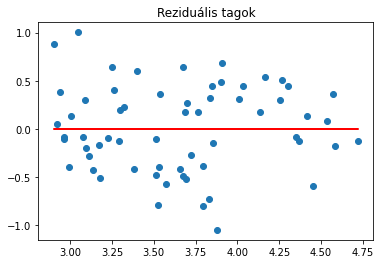

In [44]:
#ezek után nem oneVSall: lineáris regresszió
from sklearn.linear_model import LinearRegression


#tanító adaton
reg_alap_2021 = LinearRegression().fit(features,label)
reg_alap_2021.score(features, label) 

# tesztadattal

reg_2021 = LinearRegression().fit(X_train_2021,y_train_2021)
reg_pred_2021 = reg_2021.predict(X_test_2021)

#együtthatók
print("Coefficients:", reg_2021.coef_)
#RMSE

rmse = round(np.power(np.sum(np.power(y_test_2021 - reg_pred_2021, 2))/reg_pred_2021.shape[0],0.5),2)
print("RMSE:", rmse)

print("...................................................")
print("")


#R^2 és SSR
SST = np.sum(np.power(y_test_2021-np.mean(y_test_2021),2))
SSR = np.sum(np.power(reg_pred_2021-np.mean(y_test_2021),2))
R2 = round(SSR/SST,4)
print(f"R négyzet statisztika: {R2}")
import matplotlib.pyplot as plt


print("...................................................")

#Nézzük meg a reziduális tagokat
plt.scatter(reg_pred_2021, y_test_2021-reg_pred_2021)
plt.plot(reg_pred_2021, [0 for i in range(reg_pred_2021.shape[0])], c="red") #0-vonal
plt.title("Reziduális tagok")
plt.axis
plt.show()

(array([ 1.,  3.,  6.,  8., 13.,  7., 10.,  7.,  4.,  2.]),
 array([-1.04816195, -0.84304597, -0.63792999, -0.43281401, -0.22769803,
        -0.02258205,  0.18253393,  0.38764992,  0.5927659 ,  0.79788188,
         1.00299786]),
 <BarContainer object of 10 artists>)

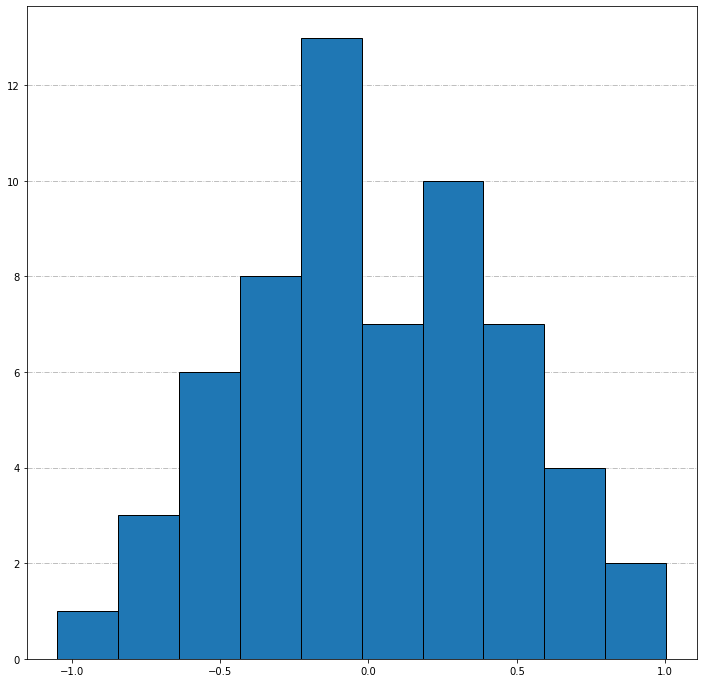

In [48]:
# a reziduálisok eloszlása

fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)
ax.grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax.hist(x=y_test_2021-reg_pred_2021, zorder=3, edgecolor='black')

Feature importances:



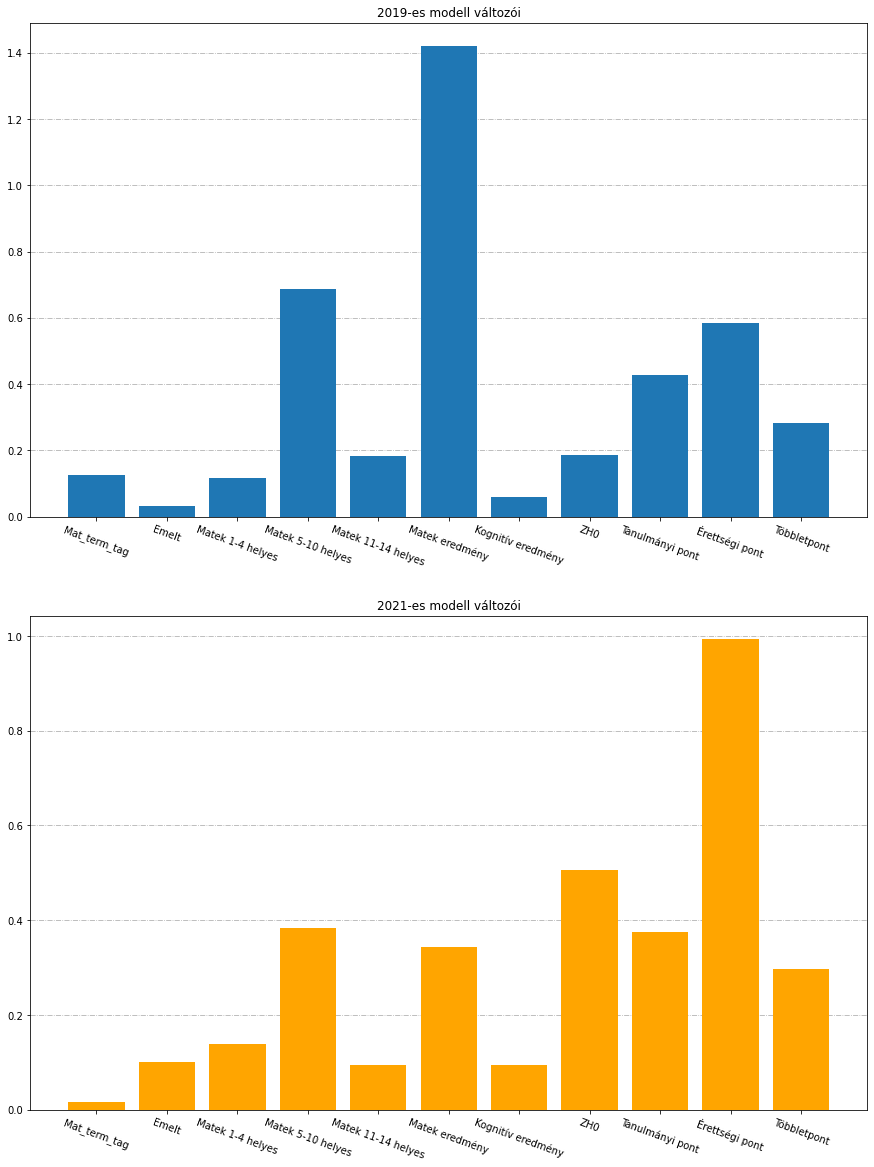

In [71]:
coeff_2019 = list(abs(reg_2019.coef_))
pairs_2019 = list(zip(list(features.columns), coeff_2019))
#pairs_2019.sort(key=lambda x: x[1])


coeff_2021 = list(abs(reg_2021.coef_))
pairs_2021 = list(zip(list(features.columns), coeff_2021))
#pairs_2021.sort(key=lambda x: x[1])

print('Feature importances:', end="\n")
print("")

fig, ax = plt.subplots(2,1)
fig.set_figheight(20)
fig.set_figwidth(15)
ax[0].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[0].bar(x=[pairs_2019[i][0] for i in range(len(pairs_2019))], height=[pairs_2019[i][1] for i in range(len(pairs_2019))], zorder=3)
ax[0].set_title("2019-es modell változói")
ax[0].tick_params(axis='x', labelrotation = -20)
ax[1].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[1].bar(x=[pairs_2021[i][0] for i in range(len(pairs_2021))], height=[pairs_2021[i][1] for i in range(len(pairs_2021))], zorder=3, color="orange")
ax[1].set_title("2021-es modell változói")
ax[1].tick_params(axis='x', labelrotation = -20)
plt.show()
